PREPROCESSING DATA TWITER

MEMASUKAN DATA

In [286]:
!pip install nltk
!pip install Sastrawi
!pip install openpyxl
!pip install scikit-learn


import pandas as pd
import numpy as np
import re


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [287]:
tweet_apple = pd.read_excel('D:\Semester 6\Pemrosesan-Teks/tugas baru/data gabung.xlsx')
tweet_apple.head()

,created_at,full_text,tweet_url,username
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI


CASE FOLDING

In [288]:
df = tweet_apple

In [289]:
#df = df.drop('conversation_id_str',axis=1)
#df = df.drop('favorite_count',axis=1)
#df = df.drop('id_str',axis=1)
#df = df.drop('image_url',axis=1)
#df = df.drop('in_reply_to_screen_name',axis=1)
#df = df.drop('lang',axis=1)
#df = df.drop('location',axis=1)
#df = df.drop('quote_count',axis=1)
#df = df.drop('reply_count',axis=1)
#df = df.drop('retweet_count',axis=1)
#df = df.drop('user_id_str',axis=1)


In [290]:
df.head()

,created_at,full_text,tweet_url,username
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI


In [291]:
import string

In [292]:
def remove_username(text):
        # Menghapus nama pengguna Twitter dalam format @username
    return re.sub(r'@\w+', '', text)

def additional_preprocessing(text):
    # Merubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus nama pengguna Twitter
    text = remove_username(text)
    # Menghapus karakter khusus
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    # Menghapus whitespace berlebih
    text = re.sub('\s+', ' ', text).strip()
    return text

In [293]:
df['text_clean'] = df['full_text'].apply(additional_preprocessing)
df.head()

,created_at,full_text,tweet_url,username,text_clean
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...


tokenizing

In [294]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data] 

In [295]:
def tokenize_text(text):
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

In [296]:
df['token'] = df['text_clean'].apply(tokenize_text)
df.head()

,created_at,full_text,tweet_url,username,text_clean,token
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"[nahh, iyaa, ka, universe, tuh, apk, nya, cuma..."
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"[coba, sini, netizen, yang, kemarin, debat, sa..."
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"[brengsek, juga, nih, seller, homepod, mini, u..."
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"[apa, artinya, apple, store, juga, batal, apa,..."
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"[indonesia, gaperlu, pabriknya, adain, apple, ..."


stopword

In [297]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [298]:
def stopwords_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [299]:
df['stop'] = df['token'].apply(stopwords_text)
df.head()

,created_at,full_text,tweet_url,username,text_clean,token,stop
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"[nahh, iyaa, ka, universe, tuh, apk, nya, cuma...","[nahh, iyaa, ka, universe, tuh, apk, nya, cuma..."
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"[coba, sini, netizen, yang, kemarin, debat, sa...","[coba, sini, netizen, kemarin, debat, sama, gw..."
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"[brengsek, juga, nih, seller, homepod, mini, u...","[brengsek, nih, seller, homepod, mini, ujung, ..."
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"[apa, artinya, apple, store, juga, batal, apa,...","[apa, artinya, apple, store, batal, apa, giman..."
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"[indonesia, gaperlu, pabriknya, adain, apple, ...","[indonesia, gaperlu, pabriknya, adain, apple, ..."


stemming

In [300]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [301]:
def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

In [302]:
df['stemmed'] = df['stop'].apply(stemming_text)
df.head

<bound method NDFrame.head of                          created_at  \
0    Thu May 02 00:11:04 +0000 2024   
1    Wed May 01 23:19:58 +0000 2024   
2    Wed May 01 20:39:53 +0000 2024   
3    Wed May 01 19:02:15 +0000 2024   
4    Wed May 01 16:55:26 +0000 2024   
..                              ...   
995  Wed May 01 22:24:19 +0000 2024   
996  Wed May 01 22:12:31 +0000 2024   
997  Wed May 01 21:53:53 +0000 2024   
998  Wed May 01 21:32:43 +0000 2024   
999  Wed May 01 21:08:26 +0000 2024   

                                             full_text  \
0    @bukanprojen Nahh iyaa ka universe tuh apk nya...   
1    @ibnux Coba sini netizen yang kemarin debat sa...   
2    brengsek juga nih seller homepod mini ujung uj...   
3    Apa artinya apple store juga batal apa gimana ...   
4    @ibnux Indonesia gaperlu pabriknya. Adain appl...   
..                                                 ...   
995  Soalnya kalau di Indonesia bisa2 Apple ganti l...   
996  @kda_ty @StefanAntonio__ @jokowi

viz

In [303]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

all_tokens = [token for sublist in df['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())


[('apple', 1287), ('store', 936), ('indonesia', 621), ('buka', 285), ('yg', 142), ('mau', 135), ('indo', 107), ('jadi', 105), ('aja', 100), ('investasi', 99), ('ga', 96), ('buat', 86), ('tim', 84), ('kalo', 77), ('resmi', 75), ('bakal', 73), ('iphone', 72), ('sini', 71), ('cook', 71), ('kalau', 69), ('beli', 68), ('pak', 68), ('apa', 67), ('gak', 65), ('pabrik', 61), ('udah', 58), ('nya', 56), ('harga', 55), ('sama', 52), ('lebih', 51), ('ibox', 51), ('bpjs', 49), ('jakarta', 48), ('dulu', 47), ('queen', 46), ('baru', 45), ('mr', 44), ('bukan', 42), ('bikin', 41), ('jual', 40), ('masuk', 40), ('batal', 39), ('negara', 39), ('lah', 39), ('cuma', 38), ('sih', 38), ('tawa', 38), ('produk', 37), ('t', 36), ('mungkin', 36), ('moga', 35), ('bangun', 34), ('kan', 33), ('banyak', 33), ('ganjar', 33), ('gilbert', 33), ('punya', 32), ('ganti', 32), ('biar', 31), ('hadir', 31), ('lama', 30), ('timnasday', 30), ('banget', 29), ('toko', 29), ('tunggu', 29), ('beneran', 29), ('vietnam', 29), ('resel

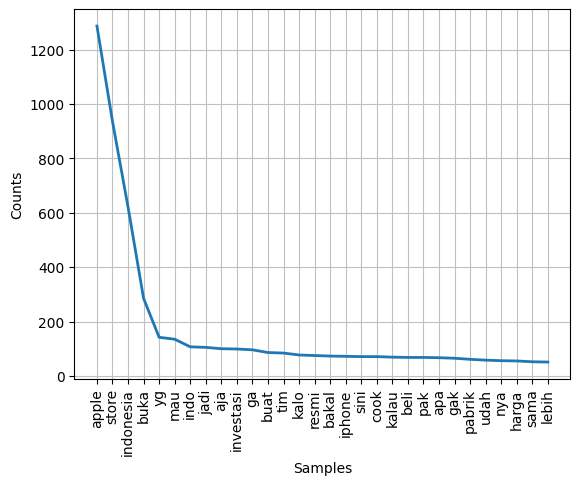

In [304]:
freq_dist.plot(30, cumulative=False)
plt.show()

In [305]:
df.to_excel("data_clean.xlsx", index= False)

In [306]:
data = pd.read_excel("data_clean.xlsx")
data.head()

,created_at,full_text,tweet_url,username,text_clean,token,stop,stemmed
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk..."
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"['coba', 'sini', 'netizen', 'yang', 'kemarin',...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...","['coba', 'sini', 'netizen', 'kemarin', 'debat'..."
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"['brengsek', 'juga', 'nih', 'seller', 'homepod...","['brengsek', 'nih', 'seller', 'homepod', 'mini...","['brengsek', 'nih', 'seller', 'homepod', 'mini..."
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"['apa', 'artinya', 'apple', 'store', 'juga', '...","['apa', 'artinya', 'apple', 'store', 'batal', ...","['apa', 'arti', 'apple', 'store', 'batal', 'ap..."
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabrik', 'adain', 'a..."


In [307]:
# !pip install --upgrade numpy
# !pip install --upgrade scikit-learn
# !pip uninstall scikit-learn
# !pip install scikit-learn

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Baca data dari file Excel
data2 = pd.read_excel("data_clean.xlsx", usecols=["stemmed"])
data2.columns = ["tweet"]

data2.head()



,tweet
0,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk..."
1,"['coba', 'sini', 'netizen', 'kemarin', 'debat'..."
2,"['brengsek', 'nih', 'seller', 'homepod', 'mini..."
3,"['apa', 'arti', 'apple', 'store', 'batal', 'ap..."
4,"['indonesia', 'gaperlu', 'pabrik', 'adain', 'a..."


In [308]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [ text for text in texts]
data2["tweet_list"] = data2["tweet"].apply(convert_text_list)

print(data2["tweet_list"])

0      [nahh, iyaa, ka, universe, tuh, apk, nya, cuma...
1      [coba, sini, netizen, kemarin, debat, sama, gw...
2      [brengsek, nih, seller, homepod, mini, ujung, ...
3      [apa, arti, apple, store, batal, apa, gimana, ...
4      [indonesia, gaperlu, pabrik, adain, apple, sto...
                             ...                        
995    [soal, kalau, indonesia, apple, ganti, logo, a...
996    [blg, tmn, it, usa, krn, ekonomi, huawei, yg, ...
997    [mungkin, bang, apple, timbang, tangan, korups...
998    [bukti, investasi, apple, rp, triliun, indones...
999    [indonesia, bangsa, yg, besar, ceo, apple, ter...
Name: tweet_list, Length: 1000, dtype: object


In [309]:
data2.head()

,tweet,tweet_list
0,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","[nahh, iyaa, ka, universe, tuh, apk, nya, cuma..."
1,"['coba', 'sini', 'netizen', 'kemarin', 'debat'...","[coba, sini, netizen, kemarin, debat, sama, gw..."
2,"['brengsek', 'nih', 'seller', 'homepod', 'mini...","[brengsek, nih, seller, homepod, mini, ujung, ..."
3,"['apa', 'arti', 'apple', 'store', 'batal', 'ap...","[apa, arti, apple, store, batal, apa, gimana, ..."
4,"['indonesia', 'gaperlu', 'pabrik', 'adain', 'a...","[indonesia, gaperlu, pabrik, adain, apple, sto..."


In [310]:
def cal_tf(document):
    TF_dict = {}
    for terms in document:
        if terms in TF_dict:
            TF_dict[terms] +=1
        else:
            TF_dict[terms] = 1
    for terms in TF_dict:
        TF_dict[terms] = TF_dict[terms]/len(document)
    return TF_dict

data2["TF_dict"] = data2["tweet_list"].apply(cal_tf)
data2["TF_dict"].head()

0    {'nahh': 0.07692307692307693, 'iyaa': 0.076923...
1    {'coba': 0.11764705882352941, 'sini': 0.117647...
2    {'brengsek': 0.038461538461538464, 'nih': 0.07...
3    {'apa': 0.25, 'arti': 0.125, 'apple': 0.125, '...
4    {'indonesia': 0.1111111111111111, 'gaperlu': 0...
Name: TF_dict, dtype: object

In [311]:
index = 600
print('%20s' % "term", "\t", "TF\n")
for key in data2["TF_dict"][index]:
    print('%20s' % key, "\t", data2["TF_dict"][index][key])

                term 	 TF

                list 	 0.125
               apple 	 0.125
               store 	 0.125
           australia 	 0.125
                 apa 	 0.125
           indonesia 	 0.125
                ikut 	 0.125
    httpstcoazlrrqcv 	 0.125


In [312]:
def cal_df (tfDict):
    count_df = {}

    for document in tfDict:
        for term in document:
            if term in count_df:
                count_df[term] +=1
            else:
                count_df[term] = 1
    return count_df

DF = cal_df(data2["TF_dict"])
print(DF)


{'nahh': 1, 'iyaa': 1, 'ka': 3, 'universe': 1, 'tuh': 19, 'apk': 1, 'nya': 47, 'cuma': 36, 'apple': 981, 'store': 867, 'apa': 60, 'gimana': 14, 'coba': 8, 'sini': 64, 'netizen': 7, 'kemarin': 7, 'debat': 1, 'sama': 50, 'gw': 12, 'kata': 15, 'indo': 100, 'muncul': 7, 'rai': 1, 'mu': 2, 'goblokkk': 1, 'brengsek': 1, 'nih': 24, 'seller': 4, 'homepod': 7, 'mini': 3, 'ujung': 3, 'kek': 18, 'beli': 53, 'baru': 40, 'lucu': 2, 'banget': 29, 'komplain': 2, 'februari': 2, 'ga': 78, 'hasil': 10, 'bangsat': 1, 'ribetnya': 2, 'diindo': 1, 'gin': 9, 'busuk': 4, 'httpstcoxfydmodj': 1, 'arti': 12, 'batal': 34, 'indonesia': 539, 'gaperlu': 2, 'pabrik': 56, 'adain': 3, 'aja': 95, 'udah': 56, 'cukup': 7, 'iya': 10, 'bener': 19, 'makan': 7, 'bahaya': 3, 'kalo': 69, 'punya': 31, 'duit': 13, 'terus': 17, 'main': 7, 'haha': 5, 'kubur': 1, 'harap': 12, 'ada': 14, 'neng': 2, 'sih': 38, 'gue': 9, 'butuh': 18, 'anjie': 1, 'nunggu': 10, 'mau': 121, 'hp': 18, 'tp': 16, 'kaga': 8, 'takut': 6, 'sepi': 4, 'soal': 22,

In [313]:
n_document = len(data2)

def calc_IDF(_n_document,_df):
     IDF_Dict = {}
     for term in _df:
          IDF_Dict[term] = np.log(_n_document / (_df[term] + 1))
     return IDF_Dict

IDF = calc_IDF(n_document,DF )
          

In [314]:
def calc_TF_IDF(TF):
     TF_IDF_Dict = {}
     for key in TF :
          TF_IDF_Dict[key] = TF[key] * IDF[key]
     return TF_IDF_Dict

data2["TF-IDF_dict"] = data2["TF_dict"].apply(calc_TF_IDF)

In [315]:
index = 600

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data2 ["TF-IDF_dict"][index]:
     print('%20s' % key,"\t", data2["TF_dict"][index][key],"\t", data2["TF-IDF_dict"][index][key])
     

                term 	         TF 	              TF-IDF

                list 	 0.125 	 0.7261428737892535
               apple 	 0.125 	 0.00227049632845889
               store 	 0.125 	 0.01769544554022335
           australia 	 0.125 	 0.7261428737892535
                 apa 	 0.125 	 0.34961017685110324
           indonesia 	 0.125 	 0.07702326742797712
                ikut 	 0.125 	 0.5249631347349909
    httpstcoazlrrqcv 	 0.125 	 0.7768260123027739


In [316]:
sorted_DF = sorted(DF.items(), key= lambda kv: kv[1], reverse=True)[:50]
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(_TF_IDF_Dict):
     TF_IDF_vector = [0.0] * len(unique_term)
     
     for i, term in enumerate(unique_term):
          if term in _TF_IDF_Dict:
               TF_IDF_vector[1]=_TF_IDF_Dict[term]
     return TF_IDF_vector

data2["TF_IDF_Vec"] = data2["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(data2["TF_IDF_Vec"][0])

print("\matrix size : ", len (data2["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.0, 0.2536028743336856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
\matrix size :  50


rank tf idf

In [317]:
TF_IDF_VEC_List = np.array(data2["TF_IDF_Vec"].to_list())
sums = TF_IDF_VEC_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
     data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
1,store,217.230142
0,apple,0.000000
37,dulu,0.000000
27,lebih,0.000000
28,bpjs,0.000000
29,jakarta,0.000000
30,nya,0.000000
31,harga,0.000000
32,ibox,0.000000
33,queen,0.000000


In [318]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

data2['tweet_join'] = data2['tweet'].apply(join_text_list)

data2['tweet_join']

0      nahh iyaa ka universe tuh apk nya cuma apple s...
1      coba sini netizen kemarin debat sama gw kata a...
2      brengsek nih seller homepod mini ujung ujung k...
3              apa arti apple store batal apa gimana nih
4      indonesia gaperlu pabrik adain apple store aja...
                             ...                        
995    soal kalau indonesia apple ganti logo apel hab...
996    blg tmn it usa krn ekonomi huawei yg sbg alas ...
997    mungkin bang apple timbang tangan korupsi indo...
998    bukti investasi apple rp triliun indonesia sek...
999    indonesia bangsa yg besar ceo apple terima lan...
Name: tweet_join, Length: 1000, dtype: object

In [319]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [320]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 100

cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(data2["tweet_join"])

normalized_TF_vector = normalize(TF_vector, norm='l2', axis=1)

tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfidf_mat = tfidf.fit_transform(data2["tweet_join"]).toarray()


In [321]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.preprocessing import normalize

max_features = 100

cvect = CountVectorizer(max_features=max_features, ngram_range = (1,3))
counts = cvect.fit_transform(data2["tweet_join"])

normalized_counts = normalize(counts, norm= 'l1', axis = 1)

tfidf = TfidfVectorizer(max_features=max_features, ngram_range= (1,3), smooth_idf=False)
tfs = tfidf.fit_transform(data2["tweet_join"])

In [322]:
type(counts)
counts.shape

(1000, 100)

In [323]:
print(tfidf.vocabulary_)

{'nya': 65, 'cuma': 29, 'apple': 2, 'store': 81, 'apa': 1, 'apple store': 4, 'sini': 80, 'sama': 77, 'indo': 43, 'store indo': 83, 'apple store indo': 6, 'beli': 16, 'baru': 14, 'banget': 11, 'ga': 31, 'batal': 15, 'indonesia': 44, 'pabrik': 66, 'aja': 0, 'udah': 97, 'kalo': 52, 'punya': 71, 'sih': 79, 'mau': 58, 'lama': 55, 'negara': 64, 'bakal': 10, 'jadi': 48, 'yg': 99, 'buat': 22, 'buka': 23, 'bikin': 19, 'dulu': 30, 'biar': 18, 'lebih': 56, 'produk': 70, 'bukan': 27, 'investasi': 45, 'buka apple': 24, 'buka apple store': 25, 'store indonesia': 84, 'apple store indonesia': 7, 'iphone': 47, 'kan': 53, 'ganti': 36, 'kalau': 51, 'toko': 95, 'gak': 32, 'lah': 54, 'jual': 50, 'harga': 41, 'masuk': 57, 'tunggu': 96, 'mungkin': 63, 'tim': 90, 'cook': 28, 'beneran': 17, 'tim cook': 91, 'mau buka': 59, 'store buka': 82, 'apple store buka': 5, 'moga': 60, 'jakarta': 49, 'pak': 67, 'buka indonesia': 26, 'bangun': 12, 'vietnam': 98, 'banyak': 13, 'apple indonesia': 3, 'reseller': 75, 'ibox': 4

In [324]:
print(tfidf.get_feature_names_out())
a=tfidf.get_feature_names_out()

['aja' 'apa' 'apple' 'apple indonesia' 'apple store' 'apple store buka'
 'apple store indo' 'apple store indonesia' 'apple store resmi'
 'apple store tawa' 'bakal' 'banget' 'bangun' 'banyak' 'baru' 'batal'
 'beli' 'beneran' 'biar' 'bikin' 'bpjs' 'bpjs gilbert' 'buat' 'buka'
 'buka apple' 'buka apple store' 'buka indonesia' 'bukan' 'cook' 'cuma'
 'dulu' 'ga' 'gak' 'ganjar' 'ganjar apple' 'ganjar apple store' 'ganti'
 'gilbert' 'gilbert naomi' 'gilbert naomi scott' 'hadir' 'harga' 'ibox'
 'indo' 'indonesia' 'investasi' 'investasi indonesia' 'iphone' 'jadi'
 'jakarta' 'jual' 'kalau' 'kalo' 'kan' 'lah' 'lama' 'lebih' 'masuk' 'mau'
 'mau buka' 'moga' 'mr' 'mr queen' 'mungkin' 'negara' 'nya' 'pabrik' 'pak'
 'pak ganjar' 'pak ganjar apple' 'produk' 'punya' 'queen' 'queen jakarta'
 'queen jakarta pak' 'reseller' 'resmi' 'sama' 'scott' 'sih' 'sini'
 'store' 'store buka' 'store indo' 'store indonesia' 'store resmi'
 'store tawa' 'store tawa bpjs' 'tawa' 'tawa bpjs' 'tim' 'tim cook'
 'timnasday' 

In [325]:
print(tfs.toarray())
b=tfs.toarray()

[[0.         0.52195958 0.13950038 ... 0.         0.         0.        ]
 [0.         0.         0.09146678 ... 0.         0.         0.        ]
 [0.         0.         0.09805746 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.21200841 ... 0.         0.         0.        ]
 [0.         0.         0.14547832 ... 0.55417491 0.         0.        ]
 [0.         0.         0.16182228 ... 0.         0.         0.25607665]]


In [326]:
tfidf_mat= normalized_counts.multiply(counts).toarray()
dfbtf = pd.DataFrame(data=tfidf_mat,columns=[a])
dfbtf


,aja,apa,apple,apple indonesia,apple store,apple store buka,apple store indo,apple store indonesia,apple store resmi,apple store tawa,...,tim,tim cook,timnasday,timnasday mr,timnasday mr queen,toko,tunggu,udah,vietnam,yg
0,0.000000,0.166667,0.166667,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,0.111111,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.000000,0.125000,0.0,0.125000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.000000,0.666667,0.166667,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.142857,0.000000,0.142857,0.0,0.142857,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
996,0.000000,0.000000,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.571429
997,0.000000,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
998,0.000000,0.000000,0.200000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.000000


In [327]:
dfbtf.to_csv("hasil_vectorspacematrix.csv")

Mulai dari sini setelah melakukan text preprocessing

memasukan data yang sudah dibersihkan

In [328]:
data3 = pd.read_excel("data_clean.xlsx")
data3.head()

,created_at,full_text,tweet_url,username,text_clean,token,stop,stemmed
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk..."
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"['coba', 'sini', 'netizen', 'yang', 'kemarin',...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...","['coba', 'sini', 'netizen', 'kemarin', 'debat'..."
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"['brengsek', 'juga', 'nih', 'seller', 'homepod...","['brengsek', 'nih', 'seller', 'homepod', 'mini...","['brengsek', 'nih', 'seller', 'homepod', 'mini..."
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"['apa', 'artinya', 'apple', 'store', 'juga', '...","['apa', 'artinya', 'apple', 'store', 'batal', ...","['apa', 'arti', 'apple', 'store', 'batal', 'ap..."
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabrik', 'adain', 'a..."


In [329]:
!pip install vaderSentiment


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


labeling data

In [330]:
# labelling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': 0,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}

analyzer.lexicon.update(additional_lexicon_id)

data3['sentimen'] = data3['text_clean'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

data3

,created_at,full_text,tweet_url,username,text_clean,token,stop,stemmed,sentimen
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...",Netral
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"['coba', 'sini', 'netizen', 'yang', 'kemarin',...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...",Netral
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"['brengsek', 'juga', 'nih', 'seller', 'homepod...","['brengsek', 'nih', 'seller', 'homepod', 'mini...","['brengsek', 'nih', 'seller', 'homepod', 'mini...",Netral
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"['apa', 'artinya', 'apple', 'store', 'juga', '...","['apa', 'artinya', 'apple', 'store', 'batal', ...","['apa', 'arti', 'apple', 'store', 'batal', 'ap...",Netral
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabrik', 'adain', 'a...",Netral
...,...,...,...,...,...,...,...,...,...
995,Wed May 01 22:24:19 +0000 2024,Soalnya kalau di Indonesia bisa2 Apple ganti l...,https://twitter.com/triwibowohari/status/17857...,triwibowohari,soalnya kalau di indonesia bisa apple ganti lo...,"['soalnya', 'kalau', 'di', 'indonesia', 'bisa'...","['soalnya', 'kalau', 'indonesia', 'apple', 'ga...","['soal', 'kalau', 'indonesia', 'apple', 'ganti...",Netral
996,Wed May 01 22:12:31 +0000 2024,@kda_ty @StefanAntonio__ @jokowi Blg tmn2 IT d...,https://twitter.com/AuroraXrypt/status/1785794...,AuroraXrypt,blg tmn it di usa krn ekonomi huawei ini yg sb...,"['blg', 'tmn', 'it', 'di', 'usa', 'krn', 'ekon...","['blg', 'tmn', 'it', 'usa', 'krn', 'ekonomi', ...","['blg', 'tmn', 'it', 'usa', 'krn', 'ekonomi', ...",Negatif
997,Wed May 01 21:53:53 +0000 2024,@idextratime Mungkin bang Apple menimbang pena...,https://twitter.com/Pram_29072021/status/17857...,Pram_29072021,mungkin bang apple menimbang penanganan korups...,"['mungkin', 'bang', 'apple', 'menimbang', 'pen...","['mungkin', 'bang', 'apple', 'menimbang', 'pen...","['mungkin', 'bang', 'apple', 'timbang', 'tanga...",Netral
998,Wed May 01 21:32:43 +0000 2024,Bukti Investasi Apple Rp 1 6 Triliun di Indone...,https://twitter.com/muttiahrochelle/status/178...,muttiahrochelle,bukti investasi apple rp triliun di indonesia ...,"['bukti', 'investasi', 'apple', 'rp', 'triliun...","['bukti', 'investasi', 'apple', 'rp', 'triliun...","['bukti', 'investasi', 'apple', 'rp', 'triliun...",Netral


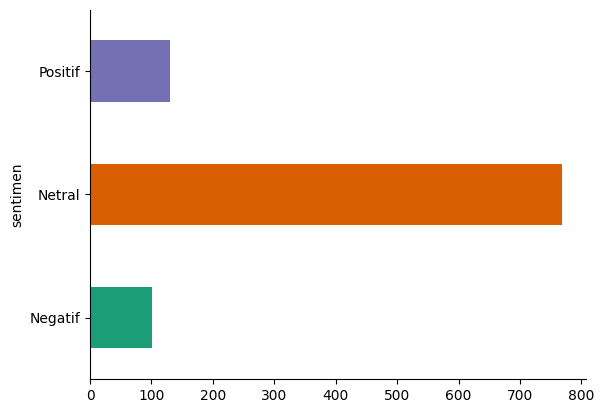

In [331]:
from matplotlib import pyplot as plt
import seaborn as sns
data3.groupby('sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [332]:
!pip install gensim


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


avg word length

In [333]:
def avg_word_length(x):
    words=x.split()
    words_length=[len(word) for word in words]
    avg_word_length=sum(words_length)/len(words)
    return avg_word_length

In [334]:
data3['avg_word_length']=data3['text_clean'].apply(lambda text: avg_word_length(text))
data3.head(10)

,created_at,full_text,tweet_url,username,text_clean,token,stop,stemmed,sentimen,avg_word_length
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...",Netral,3.687500
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"['coba', 'sini', 'netizen', 'yang', 'kemarin',...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...",Netral,4.500000
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"['brengsek', 'juga', 'nih', 'seller', 'homepod...","['brengsek', 'nih', 'seller', 'homepod', 'mini...","['brengsek', 'nih', 'seller', 'homepod', 'mini...",Netral,5.333333
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"['apa', 'artinya', 'apple', 'store', 'juga', '...","['apa', 'artinya', 'apple', 'store', 'batal', ...","['apa', 'arti', 'apple', 'store', 'batal', 'ap...",Netral,4.555556
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabrik', 'adain', 'a...",Netral,5.777778
5,Wed May 01 16:41:39 +0000 2024,@matchyour_ Iya bener makannya bahaya kalo pun...,https://twitter.com/namdoyan/status/1785711189...,namdoyan,iya bener makannya bahaya kalo punya duit teru...,"['iya', 'bener', 'makannya', 'bahaya', 'kalo',...","['iya', 'bener', 'makannya', 'bahaya', 'kalo',...","['iya', 'bener', 'makan', 'bahaya', 'kalo', 'p...",Positif,4.615385
6,Wed May 01 16:03:29 +0000 2024,Kubur saja harapan adanya apple store,https://twitter.com/judgebycover/status/178570...,judgebycover,kubur saja harapan adanya apple store,"['kubur', 'saja', 'harapan', 'adanya', 'apple'...","['kubur', 'harapan', 'adanya', 'apple', 'store']","['kubur', 'harap', 'ada', 'apple', 'store']",Netral,5.333333
7,Wed May 01 15:23:32 +0000 2024,@ibnux Berharap ada apple store aja udah senen...,https://twitter.com/Gondolz_/status/1785691533...,Gondolz_,berharap ada apple store aja udah seneng sih,"['berharap', 'ada', 'apple', 'store', 'aja', '...","['berharap', 'apple', 'store', 'aja', 'udah', ...","['harap', 'apple', 'store', 'aja', 'udah', 'ne...",Netral,4.625000
8,Wed May 01 15:20:57 +0000 2024,gue butuh apple store anjie gue nunggu mau bel...,https://twitter.com/sheize/status/178569088096...,sheize,gue butuh apple store anjie gue nunggu mau bel...,"['gue', 'butuh', 'apple', 'store', 'anjie', 'g...","['gue', 'butuh', 'apple', 'store', 'anjie', 'g...","['gue', 'butuh', 'apple', 'store', 'anjie', 'g...",Netral,3.857143
9,Wed May 01 14:52:57 +0000 2024,@ibnux Takut apple store sepi soalnya bayar pa...,https://twitter.com/mongyuni/status/1785683835...,mongyuni,takut apple store sepi soalnya bayar parkir,"['takut', 'apple', 'store', 'sepi', 'soalnya',...","['takut', 'apple', 'store', 'sepi', 'soalnya',...","['takut', 'apple', 'store', 'sepi', 'soal', 'b...",Netral,5.285714


sentence length

In [335]:
def count_word(x):
    words=x.split()
    return len(words)
data3['sentence_length'] = data3['text_clean'].apply(lambda text:count_word(text))
data3.head(10)

,created_at,full_text,tweet_url,username,text_clean,token,stop,stemmed,sentimen,avg_word_length,sentence_length
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...",Netral,3.687500,16
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"['coba', 'sini', 'netizen', 'yang', 'kemarin',...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...",Netral,4.500000,20
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"['brengsek', 'juga', 'nih', 'seller', 'homepod...","['brengsek', 'nih', 'seller', 'homepod', 'mini...","['brengsek', 'nih', 'seller', 'homepod', 'mini...",Netral,5.333333,30
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"['apa', 'artinya', 'apple', 'store', 'juga', '...","['apa', 'artinya', 'apple', 'store', 'batal', ...","['apa', 'arti', 'apple', 'store', 'batal', 'ap...",Netral,4.555556,9
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabrik', 'adain', 'a...",Netral,5.777778,9
5,Wed May 01 16:41:39 +0000 2024,@matchyour_ Iya bener makannya bahaya kalo pun...,https://twitter.com/namdoyan/status/1785711189...,namdoyan,iya bener makannya bahaya kalo punya duit teru...,"['iya', 'bener', 'makannya', 'bahaya', 'kalo',...","['iya', 'bener', 'makannya', 'bahaya', 'kalo',...","['iya', 'bener', 'makan', 'bahaya', 'kalo', 'p...",Positif,4.615385,13
6,Wed May 01 16:03:29 +0000 2024,Kubur saja harapan adanya apple store,https://twitter.com/judgebycover/status/178570...,judgebycover,kubur saja harapan adanya apple store,"['kubur', 'saja', 'harapan', 'adanya', 'apple'...","['kubur', 'harapan', 'adanya', 'apple', 'store']","['kubur', 'harap', 'ada', 'apple', 'store']",Netral,5.333333,6
7,Wed May 01 15:23:32 +0000 2024,@ibnux Berharap ada apple store aja udah senen...,https://twitter.com/Gondolz_/status/1785691533...,Gondolz_,berharap ada apple store aja udah seneng sih,"['berharap', 'ada', 'apple', 'store', 'aja', '...","['berharap', 'apple', 'store', 'aja', 'udah', ...","['harap', 'apple', 'store', 'aja', 'udah', 'ne...",Netral,4.625000,8
8,Wed May 01 15:20:57 +0000 2024,gue butuh apple store anjie gue nunggu mau bel...,https://twitter.com/sheize/status/178569088096...,sheize,gue butuh apple store anjie gue nunggu mau bel...,"['gue', 'butuh', 'apple', 'store', 'anjie', 'g...","['gue', 'butuh', 'apple', 'store', 'anjie', 'g...","['gue', 'butuh', 'apple', 'store', 'anjie', 'g...",Netral,3.857143,14
9,Wed May 01 14:52:57 +0000 2024,@ibnux Takut apple store sepi soalnya bayar pa...,https://twitter.com/mongyuni/status/1785683835...,mongyuni,takut apple store sepi soalnya bayar parkir,"['takut', 'apple', 'store', 'sepi', 'soalnya',...","['takut', 'apple', 'store', 'sepi', 'soalnya',...","['takut', 'apple', 'store', 'sepi', 'soal', 'b...",Netral,5.285714,7


excllamation mark count

In [336]:
def exclamationmark_count(text):
    count = 0
    for char in text:
        if char == '!':
            count += 1
    return count

data3['exclamationmark_count'] = data3['text_clean'].apply(lambda text: exclamationmark_count(text))
data3.head()


,created_at,full_text,tweet_url,username,text_clean,token,stop,stemmed,sentimen,avg_word_length,sentence_length,exclamationmark_count
0,Thu May 02 00:11:04 +0000 2024,@bukanprojen Nahh iyaa ka universe tuh apk nya...,https://twitter.com/bunnyseoki/status/17858242...,bunnyseoki,nahh iyaa ka universe tuh apk nya cuma ada di ...,"['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...","['nahh', 'iyaa', 'ka', 'universe', 'tuh', 'apk...",Netral,3.687500,16,0
1,Wed May 01 23:19:58 +0000 2024,@ibnux Coba sini netizen yang kemarin debat sa...,https://twitter.com/xingxongkeling/status/1785...,xingxongkeling,coba sini netizen yang kemarin debat sama gw k...,"['coba', 'sini', 'netizen', 'yang', 'kemarin',...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...","['coba', 'sini', 'netizen', 'kemarin', 'debat'...",Netral,4.500000,20,0
2,Wed May 01 20:39:53 +0000 2024,brengsek juga nih seller homepod mini ujung uj...,https://twitter.com/masbwk/status/178577114554...,masbwk,brengsek juga nih seller homepod mini ujung uj...,"['brengsek', 'juga', 'nih', 'seller', 'homepod...","['brengsek', 'nih', 'seller', 'homepod', 'mini...","['brengsek', 'nih', 'seller', 'homepod', 'mini...",Netral,5.333333,30,0
3,Wed May 01 19:02:15 +0000 2024,Apa artinya apple store juga batal apa gimana ...,https://twitter.com/crashcoursein5/status/1785...,crashcoursein5,apa artinya apple store juga batal apa gimana nih,"['apa', 'artinya', 'apple', 'store', 'juga', '...","['apa', 'artinya', 'apple', 'store', 'batal', ...","['apa', 'arti', 'apple', 'store', 'batal', 'ap...",Netral,4.555556,9,0
4,Wed May 01 16:55:26 +0000 2024,@ibnux Indonesia gaperlu pabriknya. Adain appl...,https://twitter.com/popcorncarameI/status/1785...,popcorncarameI,indonesia gaperlu pabriknya adain apple store ...,"['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabriknya', 'adain',...","['indonesia', 'gaperlu', 'pabrik', 'adain', 'a...",Netral,5.777778,9,0


split data

In [337]:
from sklearn.model_selection import train_test_split

X=data3.drop(['sentimen', 'text_clean'], axis=1)
Y=data3[['sentimen']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)

create ngram modelling

In [338]:
#Create ngram modelling
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(ngram_range=(1,2),max_features=1000)
X_train_txt=vect.fit_transform(X_train['stemmed'])
X_train_txt=pd.DataFrame(X_train_txt.toarray(),columns=vect.get_feature_names_out())
X_train_txt

,aamiin,abis,academy,ada,ada apple,adadikompas,ah,aing,air,air akan,...,yok,yok yok,you,youtube,youtuber,yuk,yuk apple,yuk yuk,zara,zionis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
X_test_txt=vect.transform(X_test['stemmed'])
X_test_txt=pd.DataFrame(X_test_txt.toarray(),columns=vect.get_feature_names_out())
X_test_txt.head()

,aamiin,abis,academy,ada,ada apple,adadikompas,ah,aing,air,air akan,...,yok,yok yok,you,youtube,youtuber,yuk,yuk apple,yuk yuk,zara,zionis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


menyatukan avg, sentence, exclamation dengan stemmed

In [340]:
#Combine with other features
X_train.index=range(0,700)
X_train_final=pd.concat([X_train_txt,X_train[['avg_word_length','sentence_length','exclamationmark_count']]],axis=1)
X_train_final.head()


,aamiin,abis,academy,ada,ada apple,adadikompas,ah,aing,air,air akan,...,youtube,youtuber,yuk,yuk apple,yuk yuk,zara,zionis,avg_word_length,sentence_length,exclamationmark_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.142857,7,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.769231,13,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.650000,20,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.714286,7,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.888889,45,0


In [341]:
X_test.index=range(0,300)
X_test_final=pd.concat([X_test_txt,X_test[['avg_word_length','sentence_length','exclamationmark_count']]],axis=1)
X_test_final.head()


,aamiin,abis,academy,ada,ada apple,adadikompas,ah,aing,air,air akan,...,youtube,youtuber,yuk,yuk apple,yuk yuk,zara,zionis,avg_word_length,sentence_length,exclamationmark_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.500000,8,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.920000,25,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.823529,17,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.514286,35,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.263158,19,0


In [342]:

X_train_final=X_train_final.values
X_test_final=X_test_final.values
Y_train=Y_train.values
Y_test=Y_test.values

FITTING RANDOM FOREST

In [343]:
from sklearn.metrics import accuracy_score,make_scorer,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier as rbf

In [344]:
pipe_rf = make_pipeline(rbf())

In [345]:
rf_param_grid = {

    'randomforestclassifier__criterion':['gini','entropy'],
    'randomforestclassifier__max_features': ['auto','sqrt','log2',None],
    'randomforestclassifier__max_depth': np.arange(1,50,1),
    'randomforestclassifier__n_estimators': np.arange(1,200,5),
    'randomforestclassifier__min_weight_fraction_leaf': np.arange(0,1,0.05),
    'randomforestclassifier__min_samples_split':np.arange(1,50,1)
    
}

# Perform RandomizedSearchCV
randomized_search_rf = RandomizedSearchCV(estimator=pipe_rf,param_distributions=rf_param_grid,n_iter=100,scoring=make_scorer(accuracy_score),verbose=1,cv=4)

In [346]:
randomized_search_rf.fit(X_train_final,Y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataCon

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=100,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42...
                                        'randomforestclassifier__min_weight_fraction_leaf': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'randomforestclassifier__n_estimators': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196])},
                   scoring=make_scorer(accuracy_score), verbose=1)

In [348]:
rf_pred=randomized_search_rf.predict(X_test_final)
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, rf_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
score1 = accuracy_score(Y_test,rf_pred)
score2 = precision_score(Y_test,rf_pred, average="weighted")
score3= recall_score(Y_test,rf_pred, average="weighted")
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[  1  29   0]
 [  0 231   0]
 [  0  31   8]]


Accuracy is  80.0 %
Precision is  0.84
Recall is  0.8


lOGISTIC REGRESSION

In [349]:
from sklearn.linear_model import LogisticRegression

pipe_logis=make_pipeline(LogisticRegression())
pipe_logis


Pipeline(steps=[('logisticregression', LogisticRegression())])

In [352]:
logis_param_grid = {
    'logisticregression__l1_ratio':np.arange(0,1,0.05),
    'logisticregression__C':np.arange(0,10,0.5)}

# Perform RandomizedSearchCV
randomized_search_logis = RandomizedSearchCV(estimator=pipe_logis,param_distributions=logis_param_grid,n_iter=100,scoring=make_scorer(accuracy_score),verbose=1,cv=4)
randomized_search_logis.fit(X_train_final,Y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('logisticregression',
                                              LogisticRegression())]),
                   n_iter=100,
                   param_distributions={'logisticregression__C': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]),
                                        'logisticregression__l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                   scoring=make_scorer(accuracy_score), verbose=1)

In [353]:
print(randomized_search_logis.best_params_)
print(randomized_search_logis.best_score_)

{'logisticregression__l1_ratio': 0.15000000000000002, 'logisticregression__C': 1.0}
0.8157142857142858


In [354]:
logis_pred=randomized_search_logis.predict(X_test_final)
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, logis_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
score1 = accuracy_score(Y_test,logis_pred)
score2 = precision_score(Y_test,logis_pred, average="weighted")
score3= recall_score(Y_test,logis_pred, average="weighted")
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


Confusion Matrix:
 [[  9  20   1]
 [  9 220   2]
 [  0  21  18]]


Accuracy is  82.33 %
Precision is  0.81
Recall is  0.82


NAIVE BAYES GAUSIAN NB

In [355]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_final,Y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [356]:
gnb_pred=gnb.predict(X_test_final)
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, gnb_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
score1 = accuracy_score(Y_test,gnb_pred)
score2 = precision_score(Y_test,gnb_pred, average="weighted")
score3= recall_score(Y_test,gnb_pred, average="weighted")
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 15  13   2]
 [ 41 165  25]
 [  1  12  26]]


Accuracy is  68.67 %
Precision is  0.76
Recall is  0.69


VOTING CLASSIFIER

In [358]:
from sklearn.ensemble import VotingClassifier
clf_voting = VotingClassifier(voting='soft',estimators=[('randomforest',randomized_search_rf),
                                                        ('logistic',randomized_search_logis),('naive bayes',gnb),])
clf_voting.fit(X_train_final, Y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
252 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO

Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\

VotingClassifier(estimators=[('randomforest',
                              RandomizedSearchCV(cv=4,
                                                 estimator=Pipeline(steps=[('randomforestclassifier',
                                                                            RandomForestClassifier())]),
                                                 n_iter=100,
                                                 param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                                                            'entropy'],
                                                                      'randomforestclassifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27...
                                                 n_iter=100,
                                                 param_distributions={'logisticregression__C': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]),
                                                                      'logisticregression__l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                                                 scoring=make_scorer(accuracy_score),
                                                 verbose=1)),
                             ('naive bayes', GaussianNB())],
                 voting='soft')

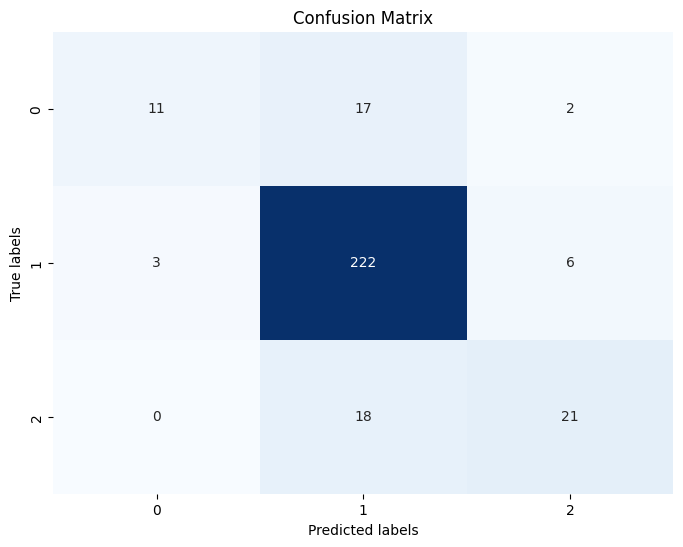



Accuracy: 84.67 %
Precision: 0.84
Recall: 0.85


Results:
  Prediction Sentiment
0     Netral   Neutral
1     Netral  Negative
2     Netral  Positive
3     Netral  Positive
4     Netral   Neutral


In [364]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan prediksi menggunakan model
voting_pred = clf_voting.predict(X_test_final)

# Mengambil nilai probabilitas untuk setiap kelas dari model
proba = clf_voting.predict_proba(X_test_final)

# Tentukan batas untuk mengklasifikasikan sentimen
threshold = 0.1

# Inisialisasi list untuk menyimpan sentimen
sentiments = []

# Iterasi melalui setiap baris dalam proba
for probs in proba:
    # Jika probabilitas kelas positif lebih besar dari threshold, klasifikasikan sebagai positif
    if probs[2] > threshold:
        sentiments.append('Positive')
    # Jika probabilitas kelas negatif lebih besar dari threshold, klasifikasikan sebagai negatif
    elif probs[0] > threshold:
        sentiments.append('Negative')
    # Jika tidak, klasifikasikan sebagai netral
    else:
        sentiments.append('Neutral')

# Membuat dataframe untuk menyimpan hasil prediksi dan sentimen
results = pd.DataFrame({'Prediction': voting_pred, 'Sentiment': sentiments})

# Membuat confusion matrix
cm = confusion_matrix(Y_test, voting_pred)

# Membuat heatmap confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Menghitung metrik evaluasi
accuracy = accuracy_score(Y_test, voting_pred)
precision = precision_score(Y_test, voting_pred, average="weighted")
recall = recall_score(Y_test, voting_pred, average="weighted")

# Menampilkan metrik evaluasi
print("\n")
print("Accuracy:", round(accuracy * 100, 2), "%")
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))

# Menampilkan hasil prediksi dan sentimen
print("\n")
print("Results:")
print(results.head())
